In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,confusion_matrix

In [ ]:
data = pd.read_csv("/content/Bank Customer Churn Prediction.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
barplot = go.Figure([go.Bar(y=[0,1],x=data['churn'].value_counts(),
                            orientation='h',
                            marker_color=['lightblue','mediumvioletred'])])
barplot.show()

In [ ]:
barplot = go.Figure([go.Bar(y=['Male','Female'],x=data['gender'].value_counts(),
                            orientation='h',
                            marker_color=['lightseagreen','indianred'])])
barplot.show()

In [ ]:
histplot = go.Figure(go.Histogram(x=data['credit_score'],nbinsx=50))
histplot.show()

In [ ]:
histplot1 = go.Figure(go.Histogram(x=np.log1p(data['age']),nbinsx=50))
histplot1.show()

In [ ]:
counts = data['country'].value_counts().to_dict()
barplot1 = go.Figure([go.Bar(y=list(counts.keys()),x=list(counts.values()),
                             orientation='h',
                            marker_color=['lightgreen','hotpink','lightblue'])])
barplot1.show()

In [ ]:
scatterp = go.Figure(go.Scatter(x=data['credit_score'],y=data['age'],mode='markers'))
scatterp.show()

In [ ]:
scatterp1 = go.Figure(go.Scatter(x=data['age'],y=data['tenure'],mode='markers'))
scatterp1.show()

In [ ]:
scatterp2 = go.Figure(go.Scatter(x=data['tenure'],y=data['balance'],mode='markers'))
scatterp2.show()

In [ ]:
violinplot = px.violin(data,x='credit_score',y='country')
violinplot.show()

In [ ]:
violinplot1 = px.violin(data,x='gender',y='credit_score',box=True)
violinplot1.show()

In [ ]:
data = data.drop('customer_id',axis=1)

In [ ]:
countries = {"France":0,"Spain":1,"Germany":2}
genders = {"Female":0,"Male":1}
data['country'] = [countries.get(x,-1) for x in data['country']]
data['gender'] = [genders.get(x,-1) for x in data['gender']]
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


In [ ]:
data.describe()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
X = data.drop('churn',axis=1)
y = data['churn']

In [ ]:
sc = MinMaxScaler()
X_s = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_s,y,random_state=42,test_size=0.2)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
def predictions(model):
  preds = model.predict(X_test)
  train_accuracy = model.score(X_train,y_train)
  test_accuracy = accuracy_score(y_test,preds)
  recall = f1_score(y_test,preds)
  c_report = pd.DataFrame(classification_report(y_test,preds,output_dict=True)).T
  cm = confusion_matrix(preds,y_test)
  return train_accuracy,test_accuracy,c_report,cm,recall

In [ ]:
recall_scores = {}

In [ ]:
preds = predictions(lr)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["LR"] = preds[4]

In [ ]:
print("Train Score:",train_score)
print("Test Score:",test_score)

Train Score: 0.81325
Test Score: 0.814


Text(0.5, 1.0, 'Confusion Matrix')

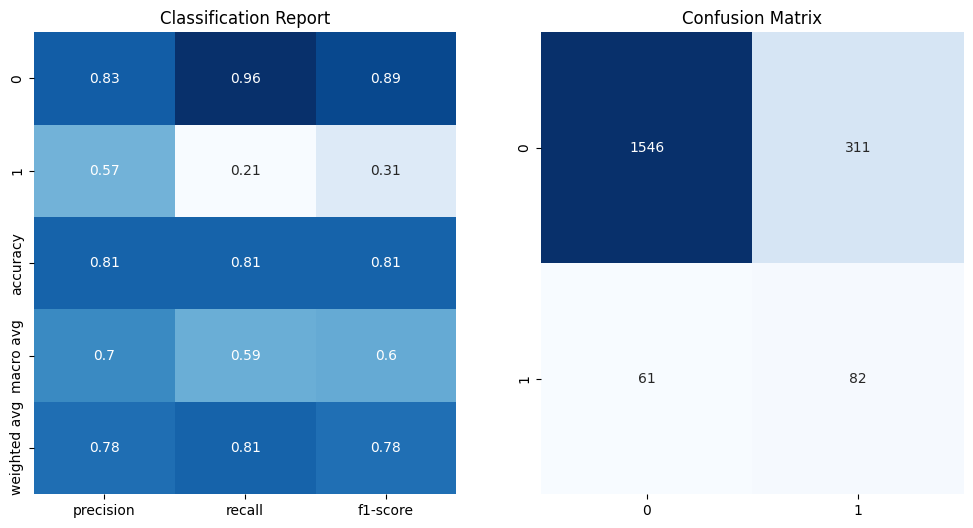

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

Train Score: 0.81325
Test Score: 0.814


Text(0.5, 1.0, 'Confusion Matrix')

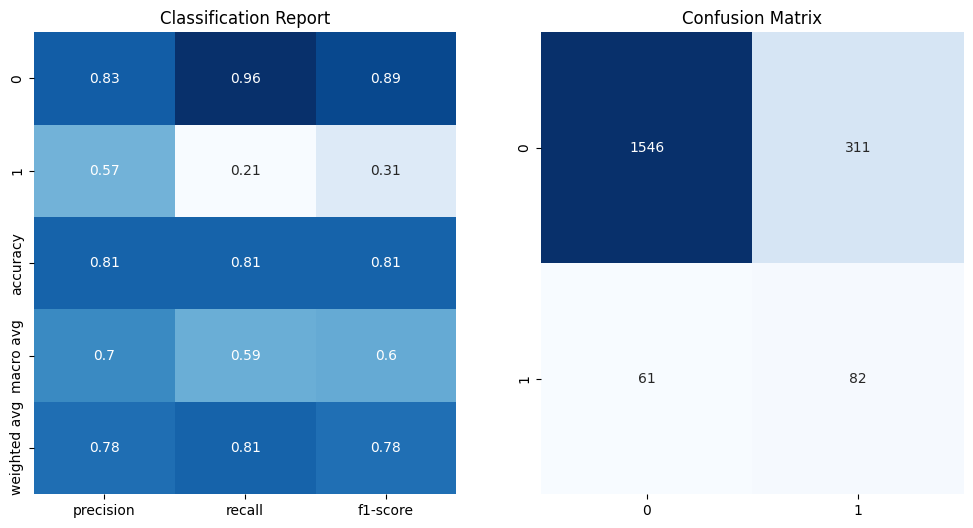

In [ ]:
preds_knn = predictions(knn)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["KNN"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
svc = SVC(C=8,kernel='rbf')
svc.fit(X_train,y_train)

SVC(C=8)

Train Score: 0.86375
Test Score: 0.8565


Text(0.5, 1.0, 'Confusion Matrix')

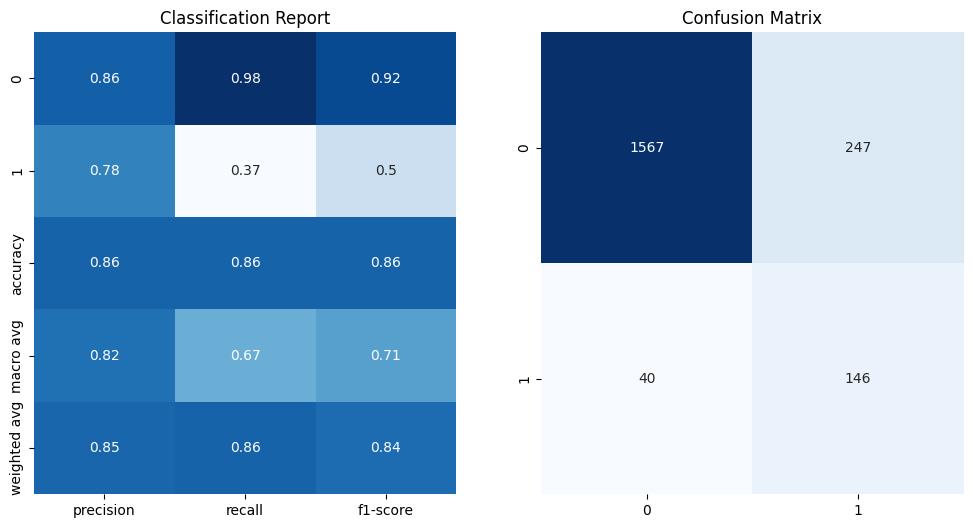

In [ ]:
preds = predictions(svc)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["SVC"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
dtree = DecisionTreeClassifier(max_depth=4,random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Train Score: 0.853375
Test Score: 0.8535


Text(0.5, 1.0, 'Confusion Matrix')

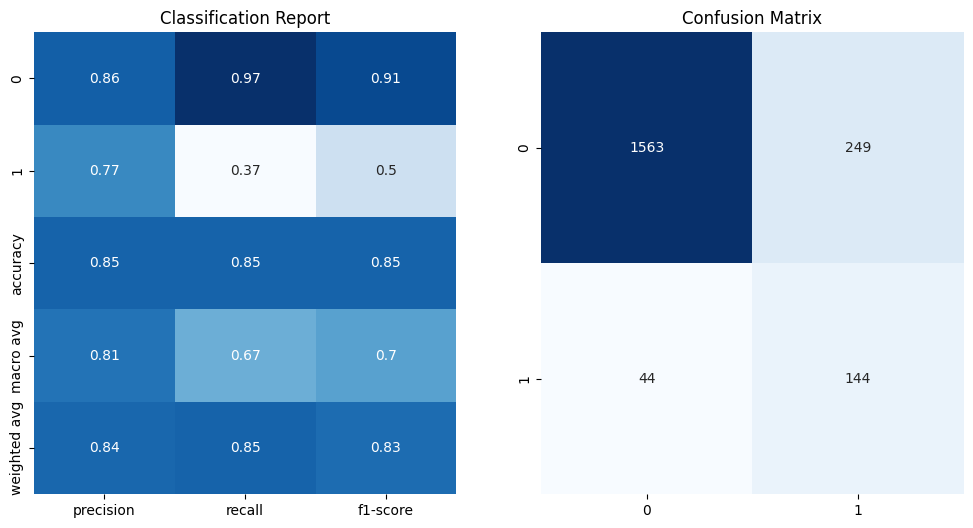

In [ ]:
preds = predictions(dtree)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["DTREE"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
rf = RandomForestClassifier(n_estimators=10,max_depth=7,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=42)

Train Score: 0.871125
Test Score: 0.862


Text(0.5, 1.0, 'Confusion Matrix')

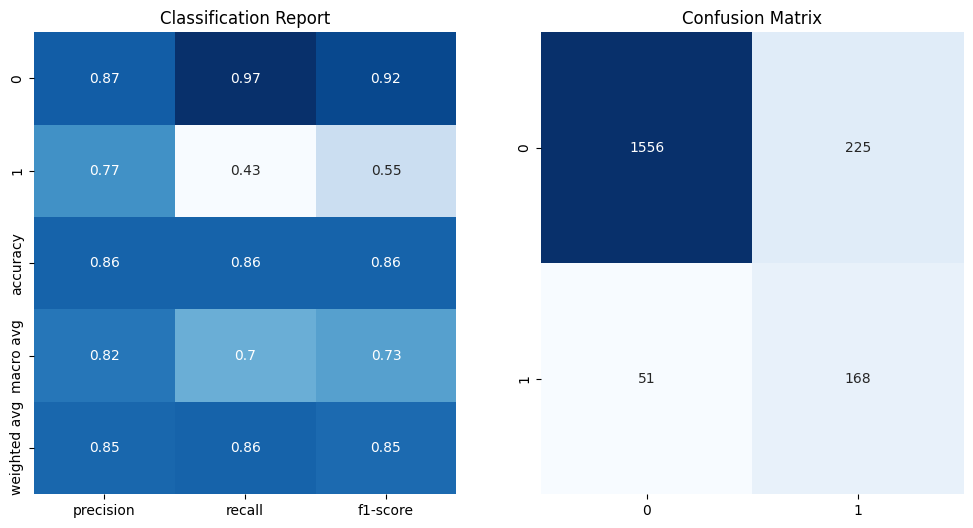

In [ ]:
preds = predictions(rf)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["RF"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=30,algorithm='SAMME',random_state=42)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=30, random_state=42)

Train Score: 0.850375
Test Score: 0.852


Text(0.5, 1.0, 'Confusion Matrix')

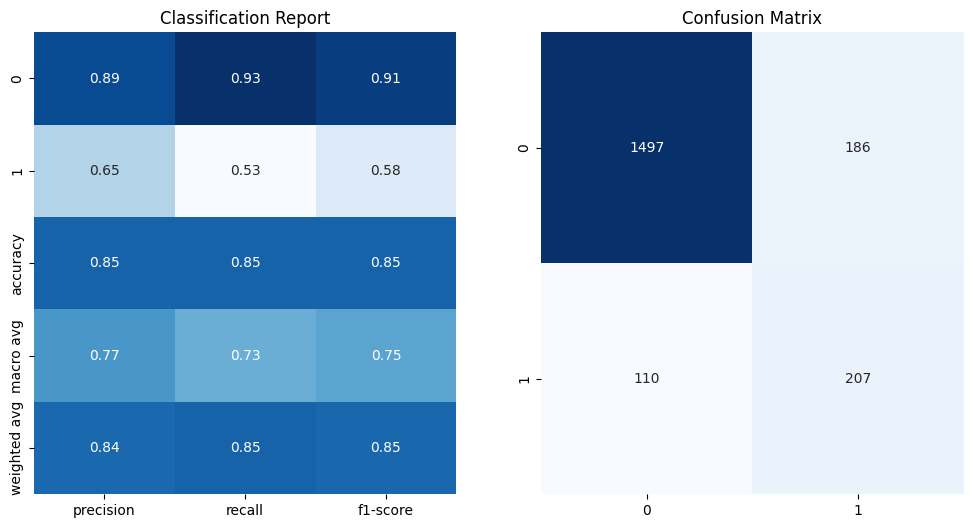

In [ ]:
preds = predictions(adaboost)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["ADABOOST"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
gboost = GradientBoostingClassifier(random_state=42,max_depth=5,min_samples_split=6,min_samples_leaf=2,subsample=0.65,n_estimators=135)
gboost.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=6,
                           n_estimators=135, random_state=42, subsample=0.65)

Train Score: 0.909875
Test Score: 0.866


Text(0.5, 1.0, 'Confusion Matrix')

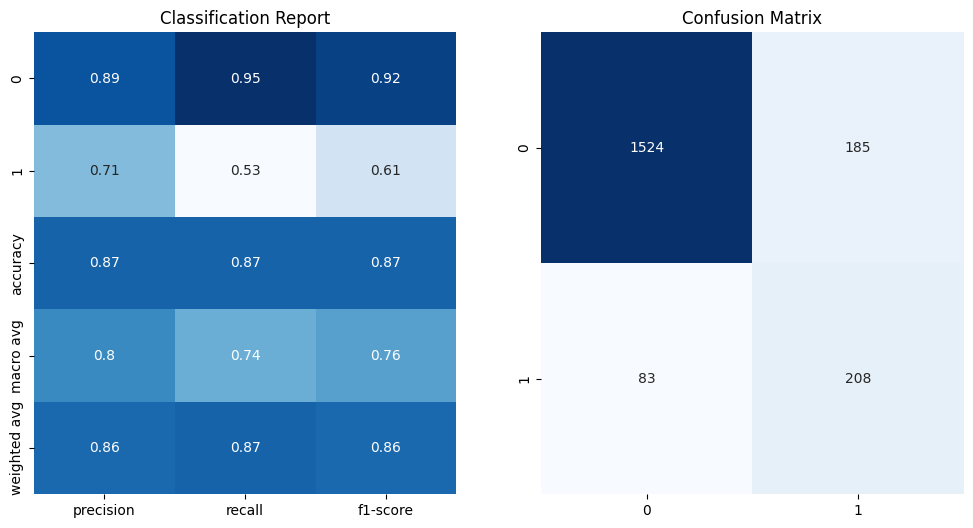

In [ ]:
preds = predictions(gboost)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["GBoost"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
xgb = XGBClassifier(scale_pos_weight=1.8,eval_metric='auc',max_depth=6,n_estimators=80,booster='gbtree',max_leaves=6,random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Train Score: 0.8685
Test Score: 0.864


Text(0.5, 1.0, 'Confusion Matrix')

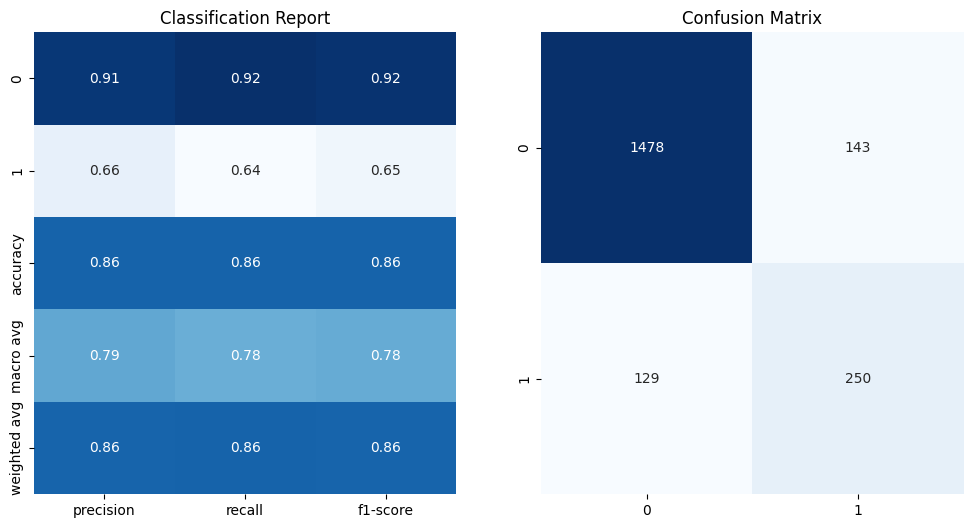

In [ ]:
preds = predictions(xgb)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["XGB"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
cbm = CatBoostClassifier(verbose=0,scale_pos_weight=2,eval_metric='AUC',min_data_in_leaf=4,max_depth=4,n_estimators=35,subsample=0.8,random_state=42)
cbm.fit(X_train,y_train)

Train Score: 0.85975
Test Score: 0.8575


Text(0.5, 1.0, 'Confusion Matrix')

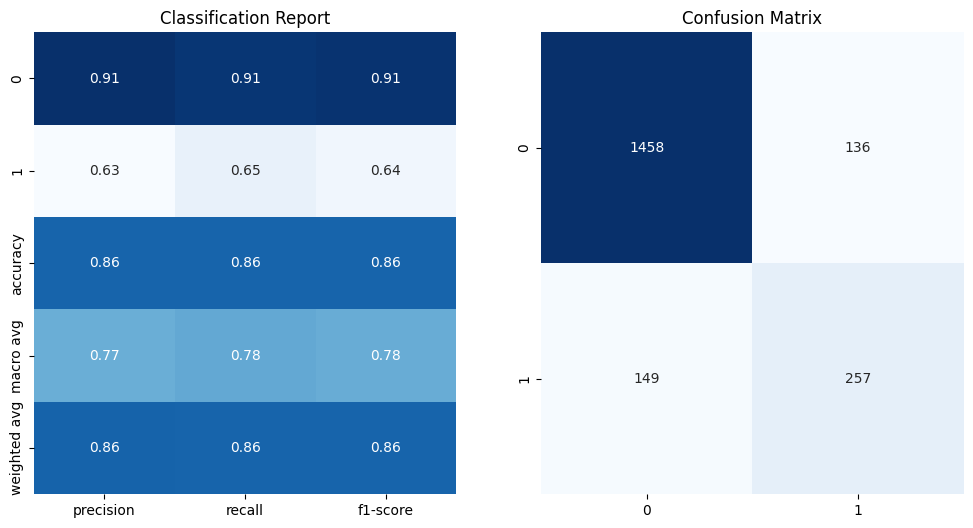

In [ ]:
preds = predictions(cbm)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["CBM"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
lgb = LGBMClassifier(n_estimators=100,is_unbalance=True,num_leaves=50,random_state=42)
lgb.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


LGBMClassifier(is_unbalance=True, num_leaves=50, random_state=42)

Train Score: 0.933625
Test Score: 0.8295


Text(0.5, 1.0, 'Confusion Matrix')

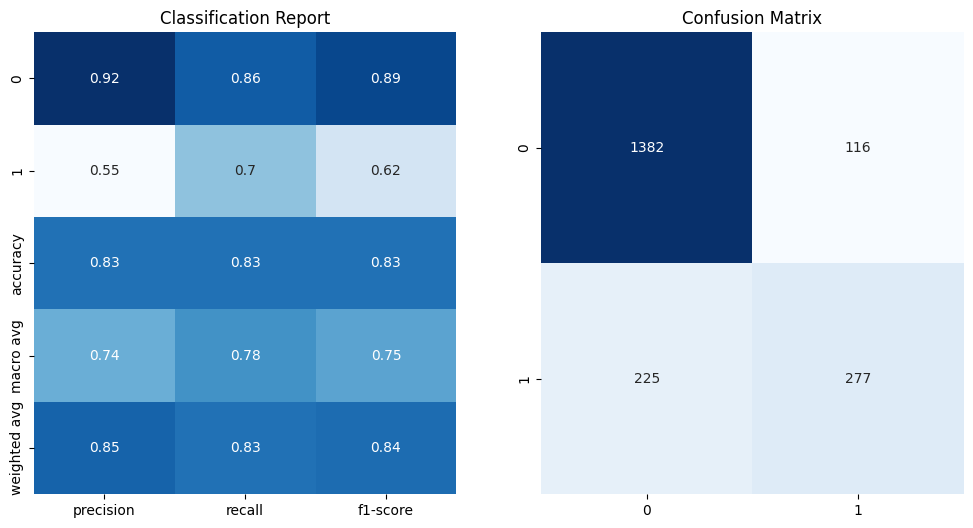

In [ ]:
preds = predictions(lgb)
train_score = preds[0]
test_score = preds[1]
c_report = preds[2]
cm = preds[3]
recall_scores["LGB"] = preds[4]
print("Train Score:",train_score)
print("Test Score:",test_score)
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(c_report.drop('support',axis=1),cmap='Blues',annot=True,cbar=False,ax=ax[0])
ax[0].set_title("Classification Report")
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',cbar=False,ax=ax[1])
ax[1].set_title("Confusion Matrix")

In [ ]:
barplot1 = go.Figure([go.Bar(y=list(recall_scores.keys()),x=list(recall_scores.values()))])
barplot1.show()